## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [1]:
#Load all required library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check dimension of data

In [4]:
df.shape

(152, 6)

In [5]:
#Check data Type

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# Check for NaN/Null values

In [8]:
df.isna().any()

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [9]:
seplngth_med=df["SepalLengthCm"].median()
sepwid_med=df["SepalWidthCm"].median()
petLngth_med=df["PetalLengthCm"].median()
petwid_med=df["PetalWidthCm"].median()
print(seplngth_med,"\n",sepwid_med,"\n",petLngth_med,"\n",petwid_med)

5.8 
 3.0 
 4.35 
 1.3


In [10]:
#Replacing the null values with the median of the respective variable

df["SepalLengthCm"].fillna(seplngth_med,inplace=True)
df["SepalWidthCm"].fillna(sepwid_med,inplace=True)
df["PetalLengthCm"].fillna(petLngth_med,inplace=True)
df["PetalWidthCm"].fillna(petwid_med,inplace=True)

df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [11]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from  sklearn.preprocessing import LabelEncoder

colsNew=df.dtypes==object
cat_cols=colsNew.index[colsNew==True]
cat_cols

enc = LabelEncoder()

for cols in cat_cols:
    df[cols]=enc.fit_transform(df[cols])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [13]:
#Slicing the data set for Dependent and Variables
X=df.drop("Species",axis=1)
y=df["Species"]
print(df.shape,df.shape,X.shape,y.shape)
print(X.head(),y.head())

(152, 6) (152, 6) (152, 5) (152,)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2 0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [14]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int32
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5           1.40           0.2
1      2            4.9           3.0           1.40           0.2
2      3            4.7           3.2           1.30           0.2
3      4            4.6           3.1           1.50           0.2
4      5            5.0           3.6           1.40           0.2
5      6

### Find the distribution of target variable (Class) (1 Marks)

In [15]:
freq = df['Species'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Species,count,prop
0,2,52,0.342105
1,1,50,0.328947
2,0,50,0.328947


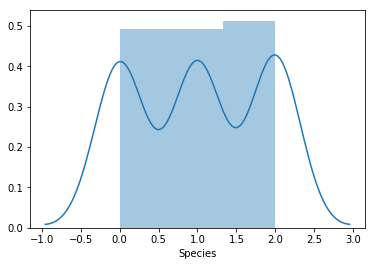

In [16]:
sns.distplot(y)

### Plot the distribution of target variable using histogram

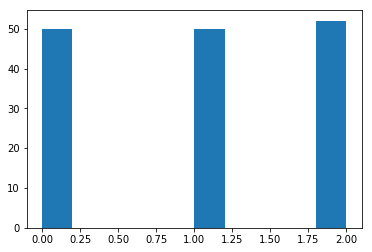

In [17]:
plt.hist(df["Species"])
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [18]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

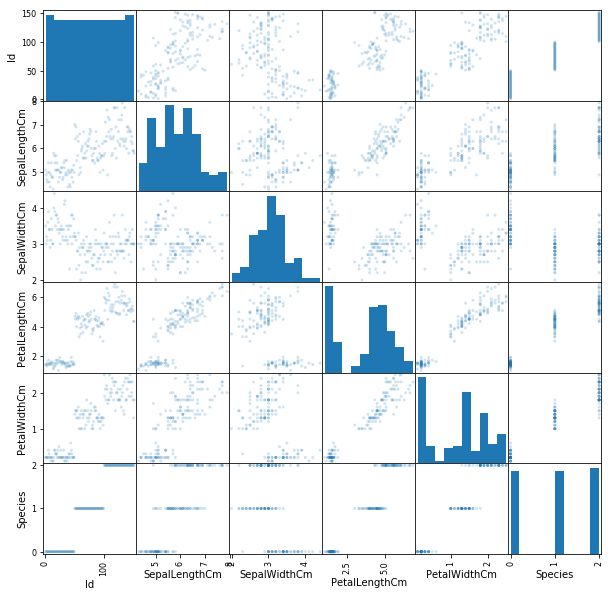

In [19]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

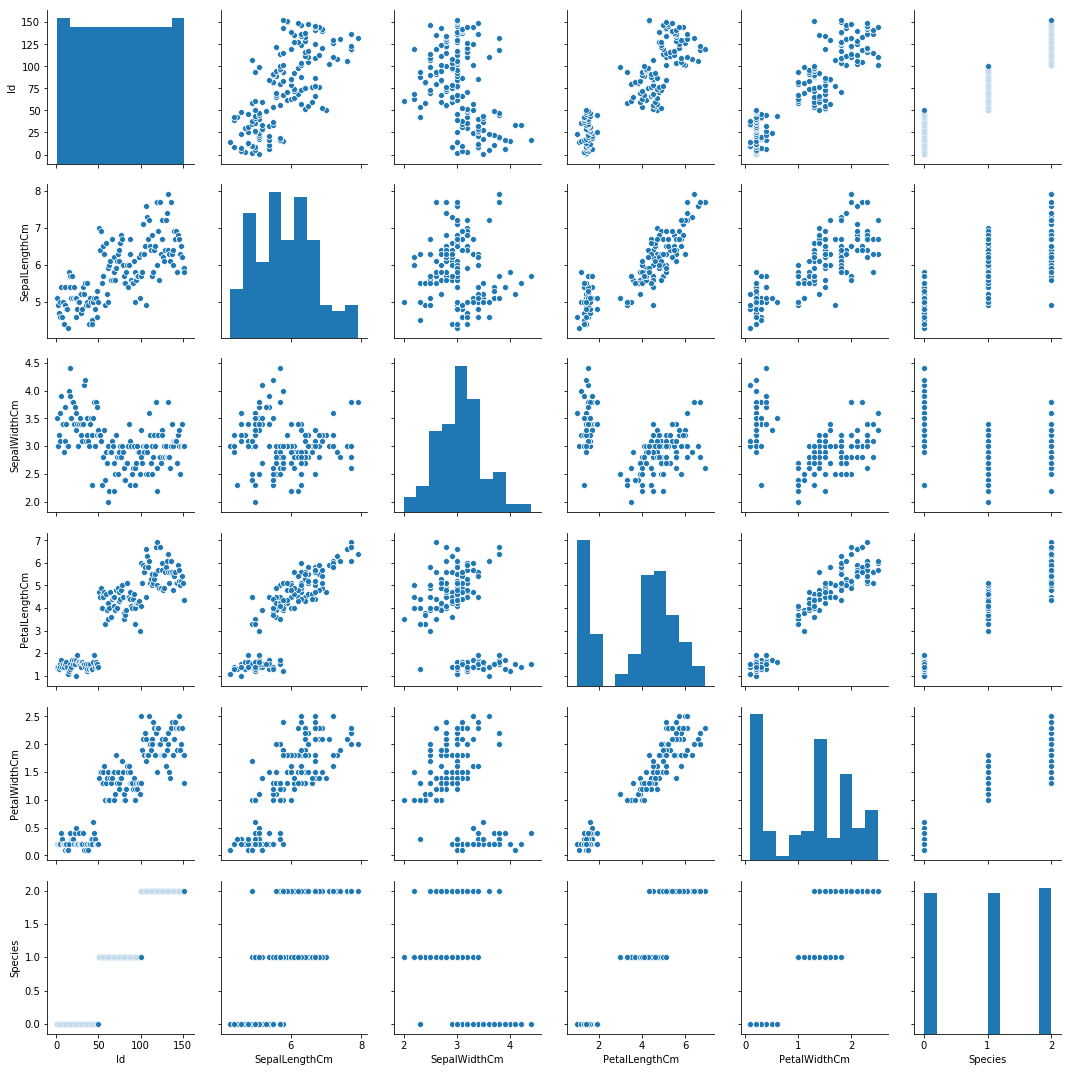

In [20]:
import seaborn as sns
sns.pairplot(df)

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [21]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


In [22]:
#Drop Id variable from data

In [23]:
df=df.drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Correlation among all variables and give your insights (1 Marks)

In [24]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [25]:
df.var

<bound method DataFrame.var of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5           1.40           0.2        0
1              4.9           3.0           1.40           0.2        0
2              4.7           3.2           1.30           0.2        0
3              4.6           3.1           1.50           0.2        0
4              5.0           3.6           1.40           0.2        0
5              5.4           3.9           1.70           0.4        0
6              4.6           3.4           1.40           0.3        0
7              5.0           3.4           1.50           0.2        0
8              4.4           2.9           1.40           0.2        0
9              4.9           3.1           1.50           0.1        0
10             5.4           3.7           1.50           0.2        0
11             4.8           3.4           1.60           0.2        0
12             4.8           3.0           1.4

### Split data in Training and Validation in 80:20 (1 Marks)

In [26]:
### SPLITTING INTO TRAINING AND TEST SETS

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape,X_test.shape)

(121, 5) (31, 5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Do Feature Scaling ( 1 Marks)

In [28]:
# Use StandardScaler or similar methods

In [29]:
from sklearn.preprocessing import StandardScaler
ct = StandardScaler()
ct.fit(X_train)
X_train_transformed = ct.transform(X_train)
print(X_train_transformed.shape)

(121, 5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [30]:
print(X_train[0:1])
t = pd.DataFrame(X_train_transformed[0:1])
t.head()

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
89  90            5.5           2.5            4.0           1.3


,0,1,2,3,4
0,0.324205,-0.399325,-1.281657,0.162805,0.152574


### Train and Fit NaiveBayes Model(2 Marks)

In [31]:
#Fit the model

In [32]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [33]:
df['prob'] = pd.DataFrame(NB.predict_proba(X_train))[1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prob
0,5.1,3.5,1.4,0.2,0,0.348697
1,4.9,3.0,1.4,0.2,0,0.348697
2,4.7,3.2,1.3,0.2,0,0.348697
3,4.6,3.1,1.5,0.2,0,0.348697
4,5.0,3.6,1.4,0.2,0,0.348697


In [39]:
#Predict

In [40]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [48]:
X_train = np.array(X)
X_train.shape

(152, 5)

In [49]:
y_train =y
y_train.shape

(152,)

In [50]:
GNB = clf.fit(X_train, y_train)


In [63]:
## Get the probability
df['prob'] = pd.DataFrame(GNB.predict_proba(X_train))[1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prob,decile
0,5.1,3.5,1.4,0.2,0,9.559739e-24,0
1,4.9,3.0,1.4,0.2,0,1.300543e-22,0
2,4.7,3.2,1.3,0.2,0,1.202471e-23,0
3,4.6,3.1,1.5,0.2,0,2.040694e-22,0
4,5.0,3.6,1.4,0.2,0,8.389542e-24,0


In [ ]:
df['Target0']= np.where((df['Species']) == 0, 1, 0)
aggregations = {
    'Target0': { 'cnt_T0' : 'sum'},
    'Target' : { 'cnt_T1' : 'sum',
                'obs' : 'count',
                'prob' : 'mean'}
}
dev_nb.groupby(['is_male', 'is_self_emp']).agg(aggregations)

In [62]:
## Model Performance Measure
## Deciling
df['decile']=pd.qcut(df.prob.rank(method='first'), 10, labels=False)

## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(X[y]),
        np.max(X[y]),
        np.mean(X[y]),
        np.size(X[y]),
        np.sum(X[Target]),
        np.size(X[Target][X[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(df,"prob","Target")
RRate

KeyError: 'Target'

In [60]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(df["Species"],df["prob"])
#auc
df.head()

ValueError: multiclass format is not supported

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [35]:
# show Confusion Matrix

In [36]:
# show accuracy

In [37]:
#Show precision and Recall metrics

## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [38]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [64]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [65]:
df.isna().any()

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

In [66]:
seplngth_med=df["SepalLengthCm"].median()
sepwid_med=df["SepalWidthCm"].median()
petLngth_med=df["PetalLengthCm"].median()
petwid_med=df["PetalWidthCm"].median()

In [67]:

df["SepalLengthCm"].fillna(seplngth_med,inplace=True)
df["SepalWidthCm"].fillna(sepwid_med,inplace=True)
df["PetalLengthCm"].fillna(petLngth_med,inplace=True)
df["PetalWidthCm"].fillna(petwid_med,inplace=True)

df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).


In [70]:
colsNew=df.dtypes==object
cat_cols=colsNew.index[colsNew==True]
cat_cols

enc = LabelEncoder()

for cols in cat_cols:
    df[cols]=enc.fit_transform(df[cols])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [72]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [88]:
df.corr().abs()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,0.109369,0.871120,0.815986,0.775061
SepalWidthCm,0.392693,0.109369,1.000000,0.420713,0.356510,0.417318
PetalLengthCm,0.872346,0.871120,0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,0.417318,0.944477,0.952513,1.000000


In [ ]:
#From the output, it is clear that none of the independent variables have a correlation between 0.1 and -0.1

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [90]:
cols=df.var()<0.1
npcols=cols.index[cols==True]
npcols

Index([], dtype='object')

In [91]:
df_out=df.drop(npcols,axis=1)
df_out.shape

(152, 6)

## Question 6

*Plot the scatter matrix for all the variables.*

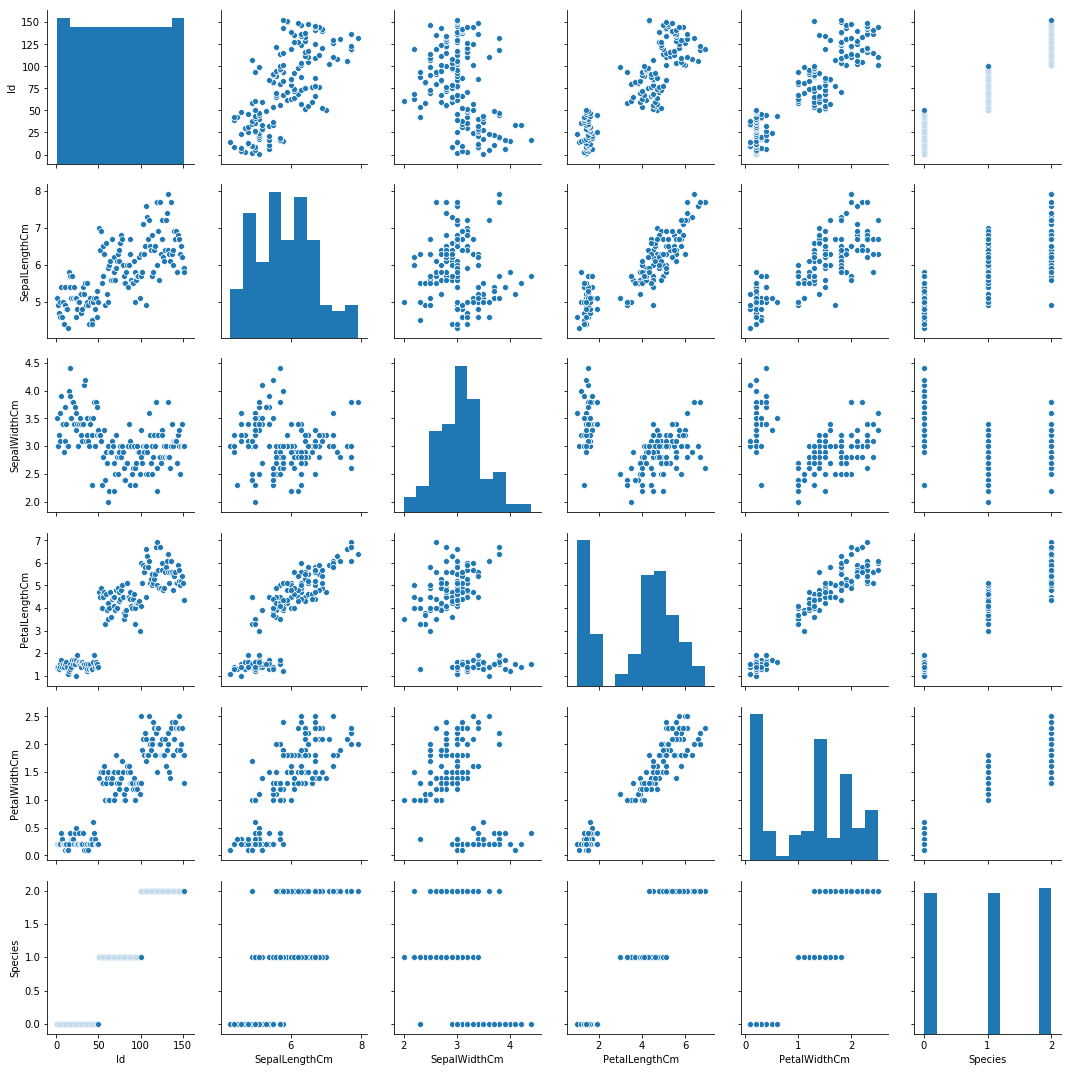

In [92]:
import seaborn as sns
sns.pairplot(df_out)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [93]:
#Slicing the data set for Dependent and Variables
X1=df_out.drop("Species",axis=1)
y1=df_out["Species"]
print(df_out.shape,df_out.shape,X1.shape,y1.shape)
print(X1.head(),y1.head())

(152, 6) (152, 6) (152, 5) (152,)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2 0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [96]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.80, random_state=0)
print(X1_train.shape,X1_test.shape)

(30, 5) (122, 5)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*